In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Algerian_forest_fires_dataset_UPDATE.csv", header=1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [5]:
df.loc[:122].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [6]:
df.drop(index=[122,123],inplace=True)
df.reset_index(inplace=True)

In [7]:
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [8]:
df['Region']=0
for i in range(len(df)):
    if i<122:
        df['Region'][i]=0
    else:
        df['Region'][i]=1
df  

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [9]:
l1=[]
l2=[]
for i in df['Region']:
    if i==0:
        l1.append(i)
    else:
        l2.append(i)
print(len(l1))
print(len(l2))

122
122


In [10]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

# Removing extra spaces from feature name

In [11]:
df.columns=df.columns.str.strip()

In [13]:
#record mismatch at 165
df.iloc[165]

index              167
day                 14
month               07
year              2012
Temperature         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Region               1
Name: 165, dtype: object

In [15]:
df.at[165,'DC']=14.6
df.at[165,'ISI']=9
df.at[165,'BUI']=12.5
df.at[165,'FWI']=10.4
df.at[165,'Classes']='fire'

# Replacing day,month,year feature with year

In [17]:
df['date']=pd.to_datetime(df[['day','month','year']])
df.drop(['day','month','year'],axis=1,inplace=True)

In [18]:
df

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,2012-06-01
1,1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0,2012-06-02
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,2012-06-03
3,3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0,2012-06-04
4,4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,241,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1,2012-09-26
240,242,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1,2012-09-27
241,243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1,2012-09-28
242,244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1,2012-09-29


In [19]:
#dropping index and classes feature
df.drop(['Classes','index'],axis=1,inplace=True)

In [20]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,date
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,2012-06-04
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,1,2012-09-26
240,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,1,2012-09-27
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,2012-09-28
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,2012-09-29


In [22]:
#checking null values
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Region         0
date           0
dtype: int64

In [24]:
df.dtypes

Temperature            object
RH                     object
Ws                     object
Rain                   object
FFMC                   object
DMC                    object
DC                     object
ISI                    object
BUI                    object
FWI                    object
Region                  int64
date           datetime64[ns]
dtype: object

# Changing the datatype of features

In [25]:
df[['Temperature','RH','Ws']]=df[['Temperature','RH','Ws']].astype(int)
df[['Rain','FFMC','DMC','ISI','BUI']]=df[['Rain','FFMC','DMC','ISI','BUI']].astype(float)

In [26]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [33]:
df['FWI']=df['FWI'].astype(float)
df['DC']=df['DC'].astype(float)

In [34]:
df.dtypes

Temperature             int32
RH                      int32
Ws                      int32
Rain                  float64
FFMC                  float64
DMC                   float64
DC                    float64
ISI                   float64
BUI                   float64
FWI                   float64
Region                  int64
date           datetime64[ns]
dtype: object

# Numeric feature

In [37]:
num_fea=[fea for fea in df.columns if df[fea].dtype!='O']

In [38]:
num_fea

['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Region',
 'date']

# Univariate Analysis

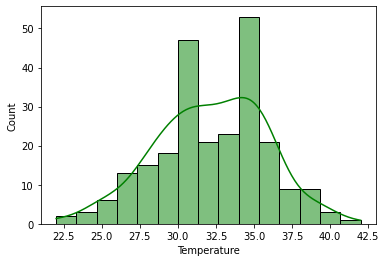

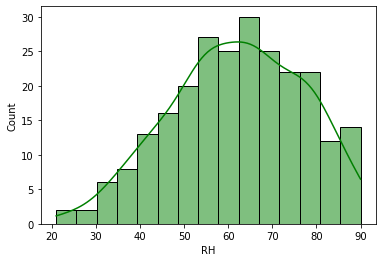

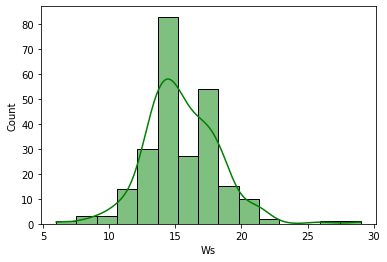

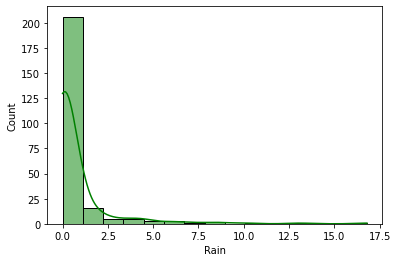

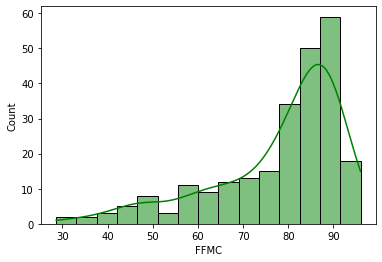

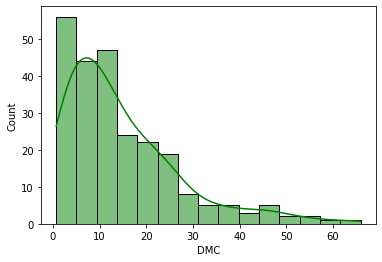

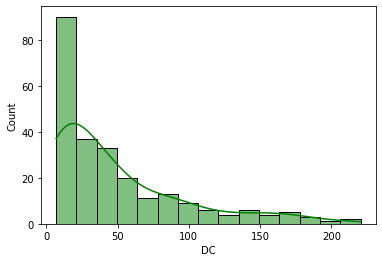

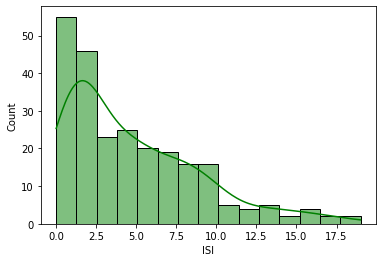

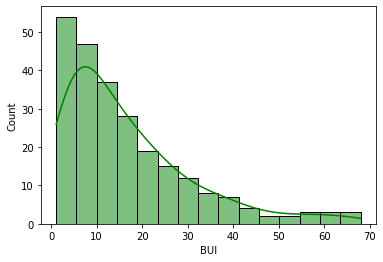

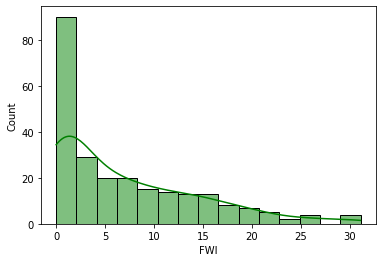

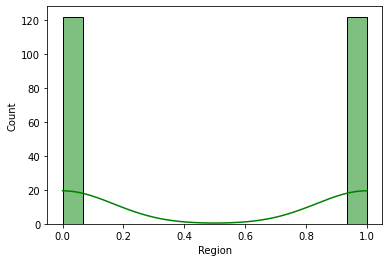

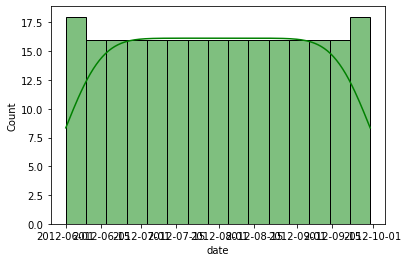

In [43]:
for fea in num_fea:
    sns.histplot(data=df,x=fea,kde=True,bins=15,color='green')
    plt.show()

# Observation on univariate analysis

1. RH is following almost guassian distribution.
2. Rain,DMC,DC,ISI,BUI,FWI are following right skewed distribution
3. FFMC following left skewed distribution

# Feature Information

Date : (DD/MM/YYYY) format where month is in (june to sept), year is 2012
Temp : Tempreture is lying between 22 to 42
RH : Relative humidity in % 21 to 90
WS : windspeed in km (6 to 29)
Rain : today rain in mm , 00 to 16.8
FFMC : index from FWI system 28.6 to 92.5
DMC : index from FWI system 1.1 to 66
DC : index from FWI system 7 to 220.4
ISI : index from FWI system 0 to 18.5
BUI : index from FWI system 1.1 to 68
FWI : index from 0 to 31.1    

# Tempreture Distribution

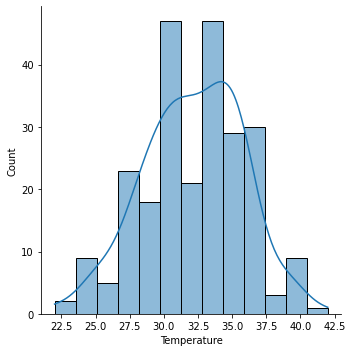

In [47]:
sns.displot(data=df,x='Temperature',kde=True)

# observation

Temperature occur most of the time in range from 32.5 to 35

# Bivariate Analysis

# 1. Temperature vs Rain

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

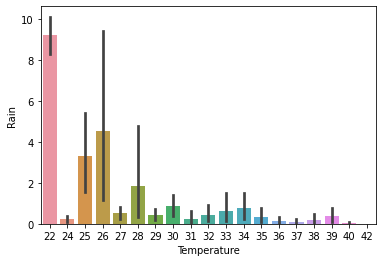

In [52]:
sns.barplot(x=df.Temperature,y=df.Rain)

In [54]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Region', 'date'],
      dtype='object')

# 2. Temperature vs region

<AxesSubplot:xlabel='Region', ylabel='Temperature'>

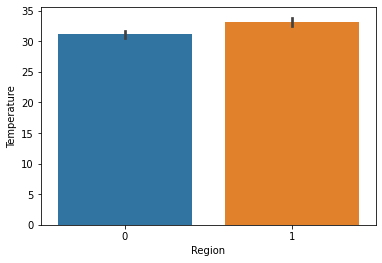

In [59]:
sns.barplot(x="Region",y="Temperature",data=df)

# 3. Temperature vs date

<AxesSubplot:xlabel='Temperature', ylabel='date'>

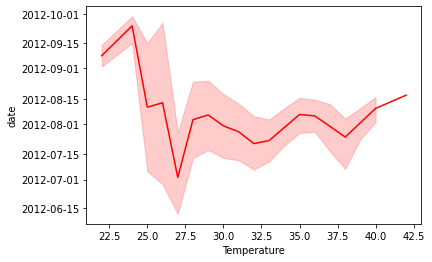

In [61]:
sns.lineplot(x="Temperature",y="date",data=df,color='r')

# Observation from Bivariate Analysis

1. Rainfall mostly happen when temperature is 22
2. Sidi bel abbas has highest temperature
3. Temperature was very high in august month of 2012

# Multivariate Analysis

<AxesSubplot:>

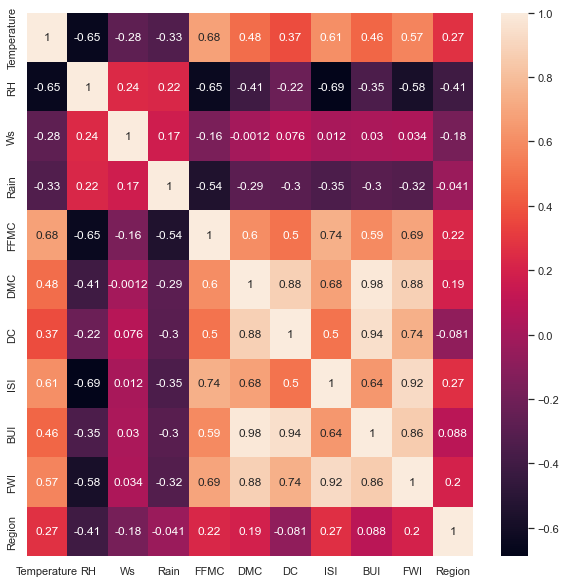

In [72]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(df.corr(),annot=True)

# Observation

1. Very highly Correlated features: DMC-BUI, DC-BUI, ISI-FWI
2. Highly correlated features: FFMC-ISI, DC-DMC, FWI-DMC, FWI-DC, FWI-BUI 
3. Note: Features with very hihg and high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, we can drop one of the two features.

# Checking outlier

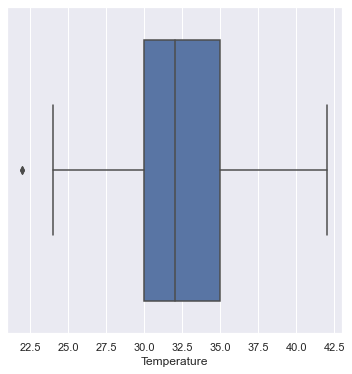

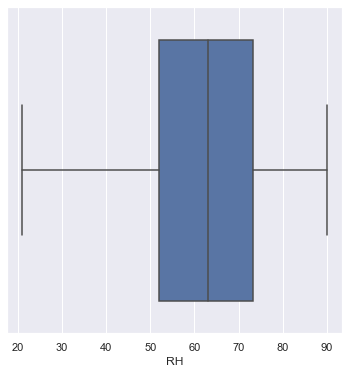

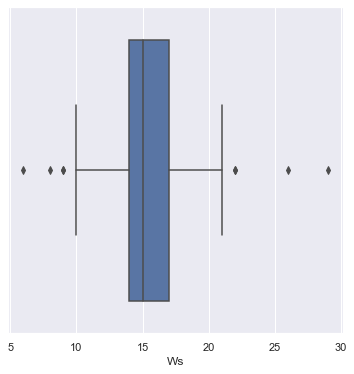

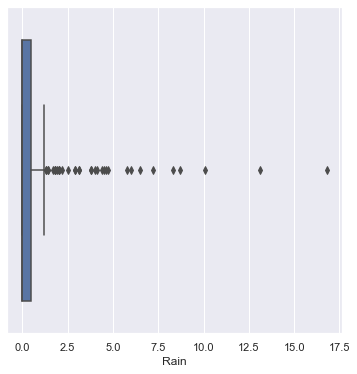

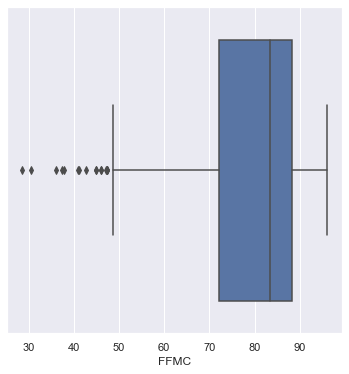

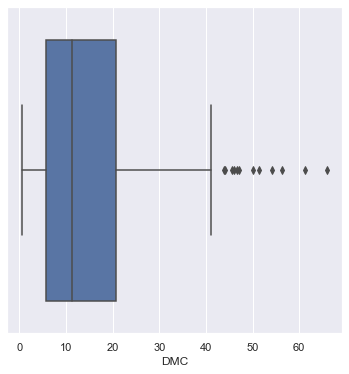

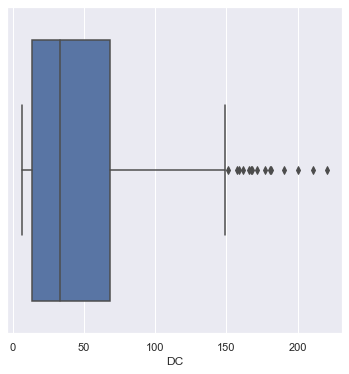

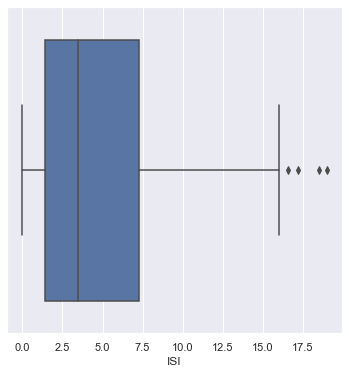

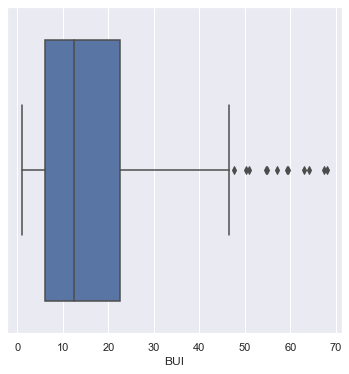

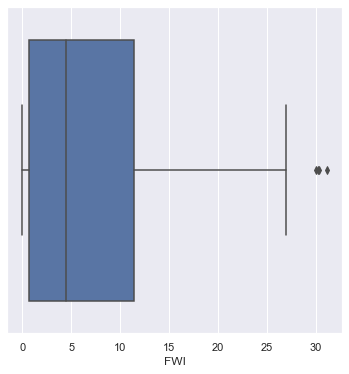

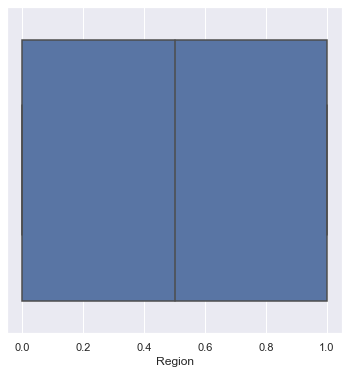

TypeError: Horizontal orientation requires numeric `x` variable.

In [98]:
sns.set(rc={'figure.figsize':(6,6)})
for fea in num_fea:
    sns.boxplot(x=df[fea])
    plt.show()

In [96]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Region', 'date'],
      dtype='object')

# Creating dependent and independent feature

In [99]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Region', 'date'],
      dtype='object')

In [113]:
# Independent feature
X=pd.DataFrame(df,columns=['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','FWI', 'Region'])

# Dependent Feature
Y=pd.DataFrame(df,columns=['Temperature'])

In [114]:
X

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...
239,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
240,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
241,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
242,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [115]:
Y

,Temperature
0,29
1,29
2,26
3,25
4,27
...,...
239,30
240,28
241,27
242,24


# splitting the dataset for training and testing the model

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=10)

In [118]:
X_train.shape

(163, 10)

In [119]:
X_test.shape

(81, 10)

In [120]:
Y_train.shape

(163, 1)

In [121]:
Y_test.shape

(81, 1)

# Standardization or feature scaling

In [122]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [123]:
X_train=scalar.fit_transform(X_train)

In [124]:
X_test=scalar.transform(X_test)

In [125]:
X_train

array([[-0.85631108, -3.36419461,  0.88853946, ..., -0.32636097,
        -0.86597829,  0.98176139],
       [-0.52508491,  0.99944243, -0.441414  , ...,  0.76499972,
         1.21371864, -1.01857744],
       [ 0.13736742,  0.99944243, -0.441414  , ...,  0.35224151,
         0.48516239, -1.01857744],
       ...,
       [-0.72382061, -0.81873967, -0.441414  , ...,  0.08639724,
         0.37919057,  0.98176139],
       [ 0.13736742, -0.45510325, -0.441414  , ..., -0.76710278,
        -0.78649943,  0.98176139],
       [ 1.13104591, -1.18237609, -0.441414  , ..., -0.27738965,
        -0.7997459 , -1.01857744]])

In [126]:
X_test

array([[-3.92594448e-01, -9.14668296e-02,  1.48701853e+00,
        -1.82411230e-01, -6.02677495e-01, -8.21325921e-01,
        -7.33709998e-01, -6.83151962e-01, -8.12992382e-01,
         9.81761387e-01],
       [ 1.37367416e-01,  6.35806011e-01, -4.41414004e-01,
         6.64566895e-01,  1.37979749e+00,  2.03374779e+00,
         5.03148781e-01,  1.72343828e+00,  1.16073273e+00,
        -1.01857744e+00],
       [-1.12129201e+00, -4.55103250e-01, -4.41414004e-01,
         9.08075201e-02, -7.86536062e-01, -8.06652268e-01,
        -6.38567015e-01, -8.30065901e-01, -7.99745905e-01,
        -1.01857744e+00],
       [ 7.11221826e-02, -4.55103250e-01, -2.41920984e-01,
        -5.94627923e-02, -7.14591405e-01, -8.10844740e-01,
        -7.09924252e-01, -7.74098686e-01, -8.12992382e-01,
        -1.01857744e+00],
       [-1.93858749e-01,  6.35806011e-01, -4.41414004e-01,
         6.78227832e-01,  1.28490116e-02,  1.74386276e-01,
         5.26934527e-01,  9.33931438e-02,  3.92437047e-01,
        -1.

# Model Training

In [127]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [128]:
regression.fit(X_train,Y_train)

LinearRegression()

In [130]:
#checking coefficient and intercept
print(regression.coef_)

[[-1.1894053  -0.52898776 -0.25118608  1.04392398 -0.29452097  0.79642928
  -0.02843277 -0.28406498  0.36267227  0.28769993]]


In [131]:
print(regression.intercept_)

[32.17791411]


# Prediction for test data

In [132]:
reg_pred=regression.predict(X_test)

In [133]:
reg_pred

array([[31.85520805],
       [33.32023288],
       [33.21807046],
       [31.54962426],
       [32.83392397],
       [34.84042006],
       [33.80989281],
       [34.26949295],
       [31.81859967],
       [32.79240656],
       [33.76738688],
       [27.66324428],
       [35.38696287],
       [29.66313126],
       [31.88093798],
       [32.11785121],
       [34.18507382],
       [28.01661619],
       [36.079289  ],
       [34.34726558],
       [32.59530447],
       [34.70784276],
       [33.52976523],
       [32.9881793 ],
       [35.84879978],
       [29.16181646],
       [32.31092863],
       [32.73296243],
       [27.54582691],
       [32.162335  ],
       [25.91964205],
       [27.35561207],
       [33.74009217],
       [32.08124527],
       [32.83052364],
       [31.011581  ],
       [28.94458723],
       [32.74881628],
       [27.70426299],
       [35.38114518],
       [32.75643987],
       [34.10208364],
       [33.96589922],
       [31.57457004],
       [36.52970822],
       [33

# Assumption of Linear regression

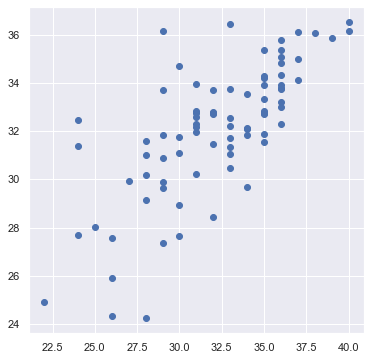

In [134]:
plt.scatter(Y_test,reg_pred)

In [135]:
#residual
lin_res=Y_test-reg_pred

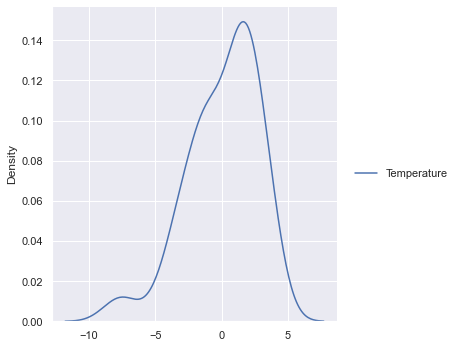

In [136]:
sns.displot(lin_res,kind="kde")

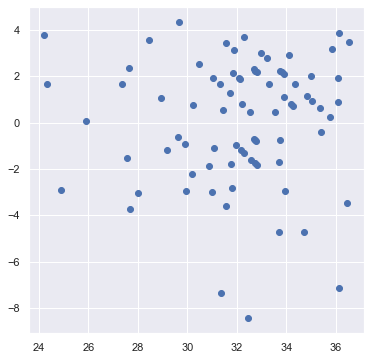

In [137]:
##scatter plot with prediction and residuals
## uniform distribution
plt.scatter(reg_pred,lin_res)

# Performance metrics

In [138]:
## Performance matric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,reg_pred))
print(mean_absolute_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test,reg_pred)))

7.143465572113119
2.182733343742494
2.6727262433914025


In [139]:
# R square and adjusted r square
from sklearn.metrics import r2_score
score=r2_score(Y_test,reg_pred)
score

0.5276232375311518

In [140]:
# adjusted r square
1-(1-score)*(len(Y_test-1))/(len(Y_test)-X_test.shape[1]-1)

0.4533926034289042

# Ridge regression

In [142]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [143]:
ridge.fit(X_train,Y_train)

Ridge()

In [144]:
print(ridge.coef_)

[[-1.18128511 -0.52862917 -0.25338075  1.02428349 -0.31526923  0.71277554
   0.04021199 -0.12974761  0.26387856  0.27825681]]


In [145]:
print(ridge.intercept_)

[32.17791411]


In [199]:
rid_pred=ridge.predict(X_test)
rid_pred

array([[31.848778  ],
       [33.30617413],
       [33.20848669],
       [31.55614175],
       [32.82680289],
       [34.82048931],
       [33.76534956],
       [34.1985969 ],
       [31.82091066],
       [32.79016762],
       [33.76425293],
       [27.67268602],
       [35.36088538],
       [29.64001932],
       [31.87642562],
       [32.11913244],
       [34.15895855],
       [28.03387827],
       [36.09670685],
       [34.36300079],
       [32.58971075],
       [34.61731153],
       [33.52136283],
       [32.99042509],
       [35.87194784],
       [29.17868097],
       [32.26521899],
       [32.74322302],
       [27.56672317],
       [32.17126894],
       [25.93574764],
       [27.35942807],
       [33.73488256],
       [32.07553167],
       [32.82019645],
       [30.98636133],
       [28.94458482],
       [32.72641426],
       [27.7179228 ],
       [35.34398646],
       [32.72783516],
       [34.10577155],
       [33.98602329],
       [31.548194  ],
       [36.50598562],
       [33

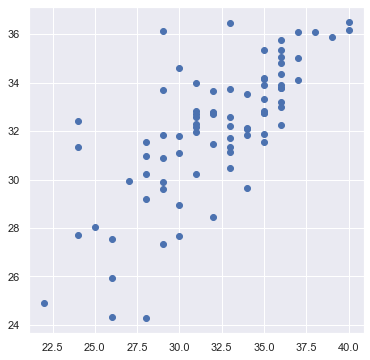

In [147]:
#Assumption on ridge regression
plt.scatter(Y_test,rid_pred)

In [189]:
## residual
rid_residual=Y_test-rid_pred

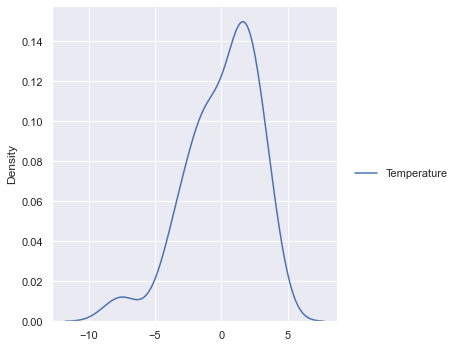

In [152]:
sns.displot(rid_residual,kind="kde")

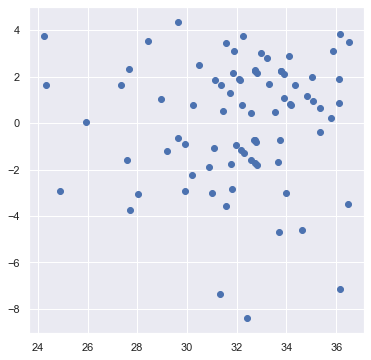

In [153]:
##scatter plot with prediction and residuals
## uniform distribution
plt.scatter(rid_pred,rid_residual)

# Performance metrics

In [154]:
## Performance matric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,rid_pred))
print(mean_absolute_error(Y_test,rid_pred))
print(np.sqrt(mean_squared_error(Y_test,rid_pred)))

7.123168367496658
2.1812779084350145
2.66892644475202


In [205]:
# R square and adjusted r square
from sklearn.metrics import r2_score
rid_score=r2_score(Y_test,rid_pred)
rid_score

0.5289654330953499

In [206]:
# adjusted r square
1-(1-rid_score)*(len(Y_test-1))/(len(Y_test)-X_test.shape[1]-1)

0.45494571543890494

# Lasso Regression

In [192]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [193]:
lasso.fit(X_train,Y_train)

Lasso()

In [194]:
print(lasso.coef_)

[-0.71955751 -0.         -0.          0.89582004  0.          0.
  0.          0.          0.          0.        ]


In [195]:
print(lasso.intercept_)

[32.17791411]


In [200]:
las_pred=lasso.predict(X_test)
las_pred

array([32.29700076, 32.6744027 , 33.06609539, 32.07346965, 32.92497671,
       33.33947653, 33.32111992, 32.77042154, 32.11916885, 32.70983221,
       33.15976154, 30.29861247, 34.17172792, 30.95174825, 33.0931383 ,
       32.31497272, 32.93691477, 29.42489766, 34.46059856, 33.50695377,
       32.46152593, 33.02899752, 33.30888217, 32.80645043, 34.5498142 ,
       30.18680443, 32.38908351, 32.89121556, 29.47641605, 31.8492542 ,
       29.50217524, 28.6091198 , 33.21226395, 32.70054654, 32.64380834,
       31.80937418, 30.23515603, 32.53110125, 29.22810977, 33.62676377,
       32.55104126, 33.23190428, 33.93112391, 31.84411936, 34.06445535,
       33.20742879, 29.78847846, 33.80519505, 33.21966653, 30.53913152,
       31.62769114, 32.373594  , 33.92016988, 32.24993288, 31.51301599,
       31.26381066, 32.303719  , 34.28571873, 31.84095256, 33.47507571,
       32.27184094, 32.20868418, 31.42230192, 29.36272493, 32.24706577,
       34.47767146, 31.13749714, 31.41648274, 33.33947653, 33.04

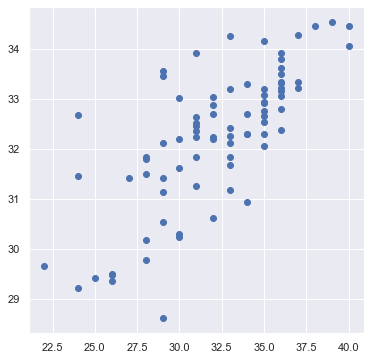

In [187]:
#Assumption on ridge regression
plt.scatter(Y_test,las_pred)

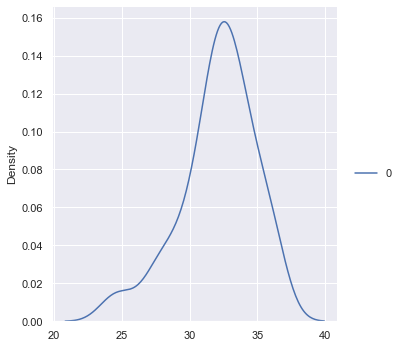

In [167]:
sns.displot(las_pred,kind="kde")

# Performance metrics on Lasso Regression

In [169]:
## Performance matric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,las_pred))
print(mean_absolute_error(Y_test,las_pred))
print(np.sqrt(mean_squared_error(Y_test,las_pred)))

7.123168367496658
2.1812779084350145
2.66892644475202


In [207]:
# R square and adjusted r square
from sklearn.metrics import r2_score
Las_score=r2_score(Y_test,las_pred)
Las_score

0.39784019626969913

In [208]:
# adjusted r square
1-(1-Las_score)*(len(Y_test-1))/(len(Y_test)-X_test.shape[1]-1)

0.3032150842549376

# Elastic Net

In [172]:
from sklearn.linear_model import ElasticNet

In [173]:
elas=ElasticNet()

In [174]:
elas.fit(X_train,Y_train)

ElasticNet()

In [175]:
print(elas.coef_)

[-0.6835853  -0.10811222 -0.01981371  0.70008078  0.07291534  0.
  0.22344754  0.04457493  0.16421688  0.        ]


In [176]:
print(elas.intercept_)

[32.17791411]


In [182]:
elas_pred=elas.predict(X_test)
elas_pred

array([31.92715998, 32.96973974, 32.69756504, 31.76291488, 32.91254192,
       34.00493801, 33.5060377 , 32.59712165, 31.92601501, 32.65411898,
       33.37117183, 29.89387458, 34.1802979 , 30.67421311, 32.614271  ,
       32.20957649, 32.78259003, 29.4313172 , 35.15441024, 33.9282945 ,
       32.35247881, 33.41849878, 33.518897  , 32.8369751 , 35.15773858,
       30.01906223, 32.07350581, 32.54493416, 29.38463109, 32.0309843 ,
       29.15335678, 28.6529111 , 33.19877539, 32.27170882, 32.6326168 ,
       31.32672672, 30.04390826, 32.26043298, 29.20813791, 33.9987256 ,
       32.83755966, 33.54875309, 34.19165641, 31.52861427, 34.53138867,
       33.38152506, 29.3049339 , 33.91639041, 33.40234151, 30.34950667,
       31.38883486, 32.29293234, 34.70335672, 31.98929195, 31.34960422,
       30.91716896, 32.3681402 , 34.8509054 , 31.62350272, 33.43338215,
       32.06604345, 32.41603386, 31.23601124, 28.8916837 , 31.89061192,
       34.84367713, 30.85124688, 31.00200227, 33.87880967, 32.87

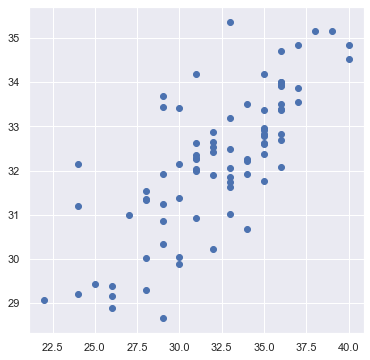

In [178]:
#Assumption on ridge regression
plt.scatter(Y_test,elas_pred)

# Performance metrics

In [201]:
## Performance matric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,elas_pred))
print(mean_absolute_error(Y_test,elas_pred))
print(np.sqrt(mean_squared_error(Y_test,elas_pred)))

8.30362464529687
2.3892966420322015
2.881601055888353


In [203]:
# R square and adjusted r square
from sklearn.metrics import r2_score
elas_score=r2_score(Y_test,las_pred)
elas_score

0.39784019626969913

In [204]:
# adjusted r square
1-(1-elas_score)*(len(Y_test-1))/(len(Y_test)-X_test.shape[1]-1)

0.3032150842549376